Lihat plot ini? Membosankan. Mari kita buat jadi animasi. 

Di video sebelumnya tentang ketapel gravitasi aku sudah pernah nunjukin kode buat bikin animasi, di sini aku bakal jelasin mengenai cara kerja kode itu ditambah ngebuat animasi gerak parabola dari video kemarin. 

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
G = 6.67e-11

mM = 1.989e30
mB = 5.9722e24
mJ = 1898e24

vM = 0
vB = 29.78e3
vJ = 13.06e3

rM = 0
rB = 149.596e9
rJ = 778.570e9

In [3]:
def accel(r1, r2, m):
    rvec = r1-r2                    # Jarak antara kedua benda
    norm = np.linalg.norm(rvec)     # Besar jaraknya
    rhat = rvec/norm                # Arahnya
    accl = -G * m / norm**2 * rhat  # Percepatannya

    return accl

In [4]:
def diff(t, y):
    rM = np.array([0, 0])
    rJ = np.array([y[0], y[2]])
    rR = np.array([y[4], y[6]])

    jxa = y[1]
    jya = y[3]
    jva = accel(rJ, rM, mM)
    jvxa = jva[0]
    jvya = jva[1]

    rxa = y[5]
    rya = y[7]
    rva = accel(rR, rM, mM) + accel(rR, rJ, mJ)
    rvxa = rva[0]
    rvya = rva[1]

    return np.array([jxa, jvxa, jya, jvya,
                     rxa, rvxa, rya, rvya])

Contohnya kita sudah punya data yang kita mau plot, terus ini buat gambaran plotnya aja.

In [5]:
plt.style.use('dark_background')

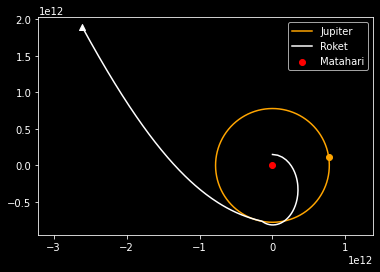

In [6]:
shift = np.radians(8)

sol = solve_ivp(
    diff, 
    [0, 4332.589*24*60*60], 
    [rJ*np.cos(shift), vJ*np.sin(shift), rJ*np.sin(shift), -vJ*np.cos(shift), 
     0, vB*1.3, rB, 0], 
     dense_output=True, 
     rtol=1e-8
)

t = np.linspace(0, 4332.589*24*60*60, 200)
y = sol.sol(t)

plt.scatter(0, 0, color="red", marker="o", label="Matahari")

plt.scatter(y[0][-1], y[2][-1], color="orange", marker="o")
plt.scatter(y[4][-1], y[6][-1], color="white", marker="^")

plt.plot(y[0], y[2], color="orange", label="Jupiter")
plt.plot(y[4], y[6], color="white", label="Roket")

plt.axis("equal")

plt.legend()

plt.show()

1. Ini kode untuk ngebuat animasinya. Kita import `animation` sama `rc` dari matplotlib. 



In [7]:
from matplotlib import animation, rc

2. Selanjutnya kita buat subplots terus terus kita `plt.close()` buat nutup plot yang bukan animasi nanti, tapi opsional.

In [8]:
fig, ax = plt.subplots()
plt.close()

3. Terus kita set limit di x sama y-nya biar pas plot animasinya dibuat, sizenya bisa mencakup semua gambar dalam plotnya. 

In [9]:
ax.set_xlim(-1e12, 1e12)
ax.set_ylim(-1e12, 1e12)

(-1000000000000.0, 1000000000000.0)

4. Selanjutnya itu yang ingin diplot, di sini ada jupiter, roket sama matahari. Buat matahari, karena dia statik di 0,0 jadi ditulisnya cuma [0, 0]. Untuk roket dan jupiter, karena mereka bergerak, jadi dikasih list kosong.

In [10]:
jupiter, = ax.plot([], [], color="orange", marker="o")
roket, = ax.plot([], [], color="white", marker="^")
matahari, = ax.plot(0, 0, color="red", marker="o")

5. Selanjutnya untuk animasinya, di sini ada fungsi `animate`. Ini tempat untuk meng-_update_ yang ingin kita plot. Karena di sini inginnya meng-_update_ titik si Jupiter dan roket, kita `set_data`nya jadi di detik itu. Di dalam fungsi `animate` ini ada input `i` yang isinya angka _frame_ ke-`i`. Sama kayak dalam kode 
```python
for i in range(frames):
    print(i)
```
misanya framesnya itu 100, jadi i bakal dihitung dari 0 sampai 99. Jadi data untuk posisi x dan y dari jupiter yang ke-`i` itu diambil untuk menjadi data dalam `animate`nya. 

In [11]:
def animate(i):
    jupiter.set_data(y[0][i], y[2][i])
    roket.set_data(y[4][i], y[6][i])
    return (jupiter, roket)

6. Terakhir, untuk ngebuat animasinya, kita panggil `animate.FuncAnimation`. 
  1. Di dalam fungsinya kita taro _figure_ kita yang dinamakan fig sebelumnya, 
  2. terus fungsi animasinya, 
  3. terus ada jumlah framesnya, di sini aku set jadi jumlah datanya, 
  4. terus blit untuk optimisasi, 
  5. repeat biar animasinya ngulang tiap selesai, 
  6. dan interval yang berarti jarak waktu per frame dalam milidetik, misalnya pengen 24 frames per second, kita set jadi 1/24 * 1000. 

In [12]:
anim = animation.FuncAnimation(fig, animate, frames=len(y[0]), blit=False, repeat=True, interval=1/24*1000)

7. Kalau dalam Jupyter atau Google Colab, kita bisa import `display` dari `IPython` lalu mendisplay animasinya

In [13]:
from IPython import display
display.display(anim)

8. Atau menggunakan fungsi `rc` yang kita import sebelumnya biar bisa langsung ditampilkan.

In [14]:
rc('animation', html='jshtml')
anim

9. Untuk menyimpan animasi, bisa dilakukan dengan cara seperti ini.

In [15]:
dpi = 300
writer = animation.FFMpegWriter(fps=24)
anim.save('video.mp4',writer=writer,dpi=dpi)

Sekarang kita coba untuk gerak parabola

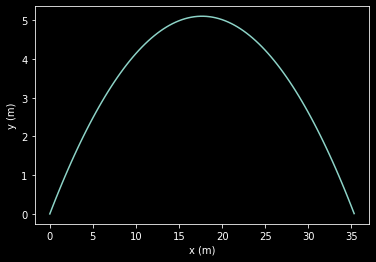

In [16]:
v0 = 20
angle = np.radians(30)

t1 = np.linspace(0, 2.04, 100)

x = v0 * np.cos(angle) * t1
y = v0 * np.sin(angle) * t1 + 1/2 * (-9.8) * t1**2

plt.plot(x, y)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

Kita mau buat biar keliatan ada bola yang kelempar sama ada garis yang nunjukin jalurnya

In [20]:
fig, ax = plt.subplots()
plt.close()

ax.set_xlim(0, 36)
ax.set_ylim(0, 6)

bola, = ax.plot(0, 0, marker="o")
jalur, = ax.plot([], [])

def animate(i):
    bola.set_data(x[i], y[i])
    jalur.set_data(x[:i], y[:i])
    return (bola, jalur)

anim = animation.FuncAnimation(fig, animate, frames=len(y), blit=False, repeat=True, interval=1/24*1000)
anim

In [21]:
dpi = 300
writer = animation.FFMpegWriter(fps=24)
anim.save('video2.mp4',writer=writer,dpi=dpi)

Semoga berguna, bhay!